In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [18]:
batch_size=128
num_classes=10
epochs=5

#the data,split between train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#Normalize to 0 to 1 range
x_train /=255
x_test /=255

print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

#convert class vectors to binary class matrices
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

60000 train samples
10000 test samples


In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


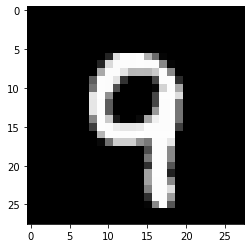

In [20]:
print("Label:",y_test[4550:4551])
plt.imshow(x_test[4550:4551].reshape(28,28),cmap='gray')

Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


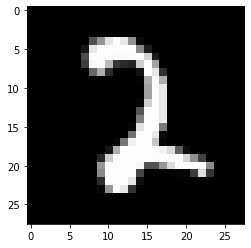

In [21]:
print("Label:",y_test[4549:4550])
plt.imshow(x_test[4549:4550].reshape(28,28),cmap='gray')

In [22]:
#randomly given 32
first_layer_size=32
model=Sequential()
#hidden layers
#layer is used - Dense
#if using convolution then convolution layer
model.add(Dense(first_layer_size,activation='sigmoid',input_shape=(784,)))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
#output layer
#cant have sigmoid for multi class classification 
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [23]:
#to build model
#loss functions
#if one class then binary_crossentropy, if multiclass then categorical_crossentropy
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [25]:
#Write the train input and output variables,size of the batch, number of epochs
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=10,
                   verbose=1)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2087 - accuracy: 0.9417
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1834 - accuracy: 0.9487
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1656 - accuracy: 0.9533
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1518 - accuracy: 0.9567
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1407 - accuracy: 0.9608
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1315 - accuracy: 0.9632
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1239 - accuracy: 0.9649
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.9668
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.9681
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9701

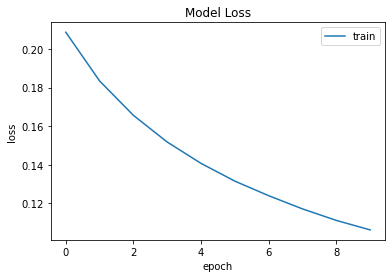

In [28]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'],'g')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

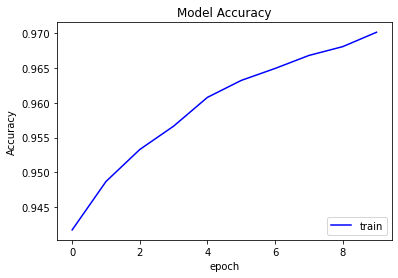

In [30]:
plt.plot(history.history['accuracy'],'b')
#plt.plot(history.history['val_acc'],'g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

In [33]:
#write the tesing input and output variables
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.14414261281490326
Test accuracy: 0.9587000012397766


In [34]:
#Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction=prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [9.47019726e-05 1.88660567e-06 5.06581216e-07 1.04270272e-04
 8.48868922e-07 9.99433219e-01 2.45551892e-05 1.42538488e-08
 2.34392093e-04 1.05626525e-04]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


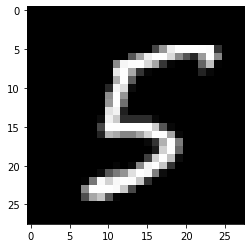

In [36]:
#write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()